In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('../data/train.csv')
df.head()

pd.set_option('display.max_columns', None)

In [2]:
df = df.drop(['id','Name'],axis=1)
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  object 
 3   Working Professional or Student        140700 non-null  object 
 4   Profession                             104070 non-null  object 
 5   Academic Pressure                      27897 non-null   float64
 6   Work Pressure                          112782 non-null  float64
 7   CGPA                                   27898 non-null   float64
 8   Study Satisfaction                     27897 non-null   float64
 9   Job Satisfaction                       112790 non-null  float64
 10  Sleep Duration                         140700 non-null  

In [4]:
df.shape

(140700, 18)

In [5]:
df.isnull().sum()

Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
df.nunique()

Gender                                     2
Age                                       43
City                                      98
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     331
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [7]:
percent_of_missing = (df.isnull().sum()/len(df))*100
print("Percentage of missing values in the features are: ", percent_of_missing)

Percentage of missing values in the features are:  Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64


In [8]:
df = df.drop(['Academic Pressure', 'CGPA', 'Study Satisfaction'],axis=1) # dropping them because of high count of missingness

df.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [9]:
city_corrections = {
    "Molkata": "Kolkata",
    "Tolkata": "Kolkata",
    "Khaziabad": "Ghaziabad",
    "Nalyan": "Kalyan",
    "Less Delhi": "Delhi",
    "Less than 5 Kalyan": "Kalyan"
}
df['City'] = df['City'].replace(city_corrections)
valid_cities = [
    'Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
    'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
    'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
    'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
    'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
    'Bhopal', 'Indore', 'Gurgaon'
]

profession_corrections = {
    "Finanancial Analyst": "Financial Analyst",  # common spelling mistake
    "UX/UI Designer": "Designer",
    "Research Analyst": "Analyst"
}
df['Profession'] = df['Profession'].replace(profession_corrections)
valid_professions = [
    "Software Engineer", "Doctor", "Teacher", "Lawyer", "Business Analyst",
    "Chef", "Engineer", "Nurse", "Accountant", "Data Scientist", "Journalist",
    "Consultant", "Architect", "Pharmacist", "Dentist", "Designer", "Scientist"
]

sleep_corrections = {
    "8 hours": "More than 8 hours",
    "9-6 hours": "More than 8 hours",
    "10-11 hours": "More than 8 hours",
    "1-6 hours": "Less than 5 hours",
    "than 5 hours": "Less than 5 hours"
}
df['Sleep Duration'] = df['Sleep Duration'].replace(sleep_corrections)
valid_sleep = [
    "Less than 5 hours", "5-6 hours", "6-7 hours", "7-8 hours", "More than 8 hours"
]

dietary_corrections = {
    "More Healthy": "Healthy",
    "Less Healthy": "Unhealthy",
    "No Healthy": "Unhealthy"
}
df['Dietary Habits'] = df['Dietary Habits'].replace(dietary_corrections)
valid_dietary = ["Healthy", "Unhealthy", "Moderate"]

degree_corrections = {
    "MTech": "M.Tech",
    "B.Sc": "B.Sc",
    "MSc": "M.Sc",
    "B.Ed": "B.Ed",
    "M.Ed": "M.Ed"
}
df['Degree'] = df['Degree'].replace(degree_corrections)
valid_degrees = [
    "B.Tech", "M.Tech", "MBA", "PhD", "B.Sc", "M.Sc", "B.Com", "M.Com",
    "MCA", "BBA", "MBBS", "LLB", "LLM", "M.Ed", "B.Ed", "M.Pharm", "B.Pharm"
]

df['City'] = df['City'].apply(lambda x: x if str(x).strip() in valid_cities else np.nan)
df['Profession'] = df['Profession'].apply(lambda x: x if str(x).strip() in valid_professions else np.nan)
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: x if str(x).strip() in valid_sleep else np.nan)
df['Dietary Habits'] = df['Dietary Habits'].apply(lambda x: x if str(x).strip() in valid_dietary else np.nan)
df['Degree'] = df['Degree'].apply(lambda x: x if str(x).strip() in valid_degrees else np.nan)

df.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,NaN,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [10]:
df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', nan, 'Gurgaon'], dtype=object)

In [11]:
df['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Software Engineer',
       'Data Scientist', 'Accountant', 'Designer', 'Pharmacist',
       'Architect', 'Consultant', 'Lawyer', 'Doctor'], dtype=object)

In [12]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       nan, '6-7 hours'], dtype=object)

In [13]:
df['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', nan], dtype=object)

In [14]:
df['Degree'].unique()

array([nan, 'LLB', 'B.Pharm', 'BBA', 'MCA', 'B.Ed', 'B.Com', 'MBA',
       'M.Com', 'M.Tech', 'PhD', 'M.Ed', 'M.Sc', 'B.Tech', 'LLM', 'MBBS',
       'M.Pharm', 'B.Sc'], dtype=object)

In [15]:
features_with_NaN = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

features_with_NaN

['City',
 'Profession',
 'Work Pressure',
 'Job Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Financial Stress']

In [16]:
df.shape

(140700, 15)

In [17]:
# numerical features - contiuous
Num_feat = ['Age', 'Work/Study Hours']

# categorical features - ordinal: meaning they have order (from 1 - 5)
ordinal_feat = ['Work Pressure', 'Job Satisfaction', 'Financial Stress']

# categorical features - nominal: meaning they have no order, just categories
nominal_feat = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits',
                'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# classification target dependent feature
target = ['Depression']

<Axes: xlabel='Depression'>

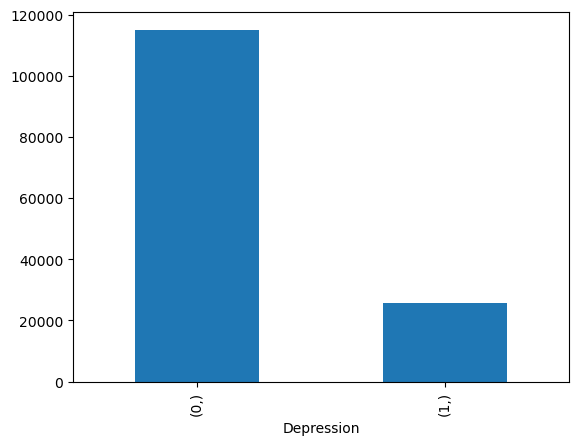

In [18]:
df[target].value_counts().plot(kind='bar')

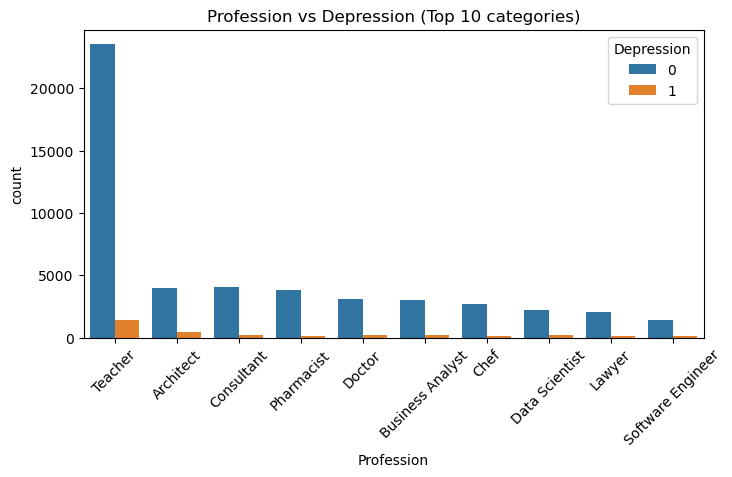

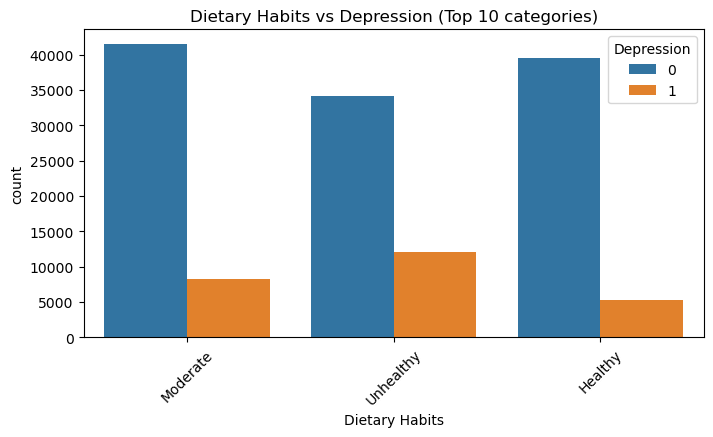

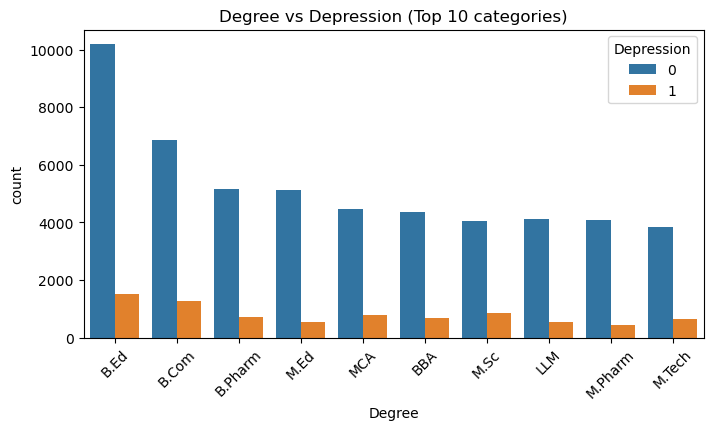

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

## find the relationship between the features with missing values and depression

for col in ['Profession', 'Dietary Habits', 'Degree']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Depression', order=df[col].value_counts().head(10).index)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Depression (Top 10 categories)")
    plt.show()


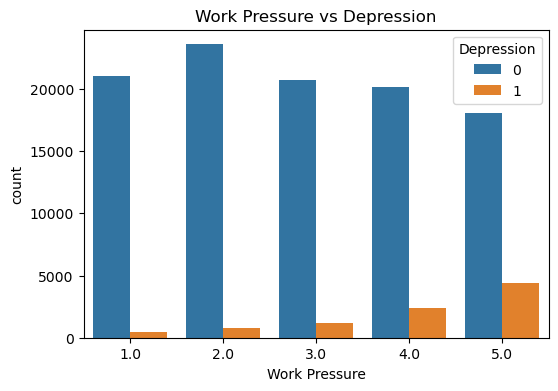

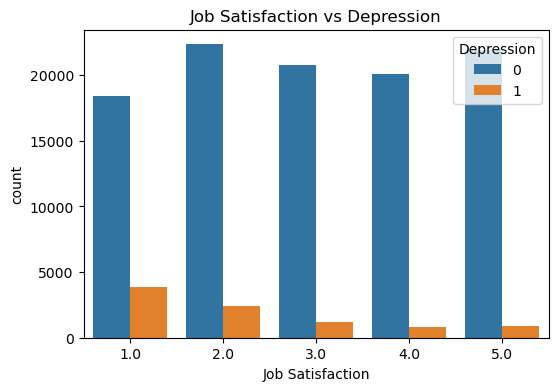

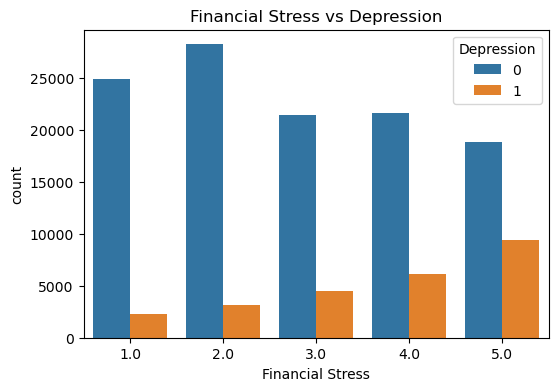

In [20]:
for col in ['Work Pressure', 'Job Satisfaction', 'Financial Stress']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Depression')
    plt.title(f"{col} vs Depression")
    plt.show()

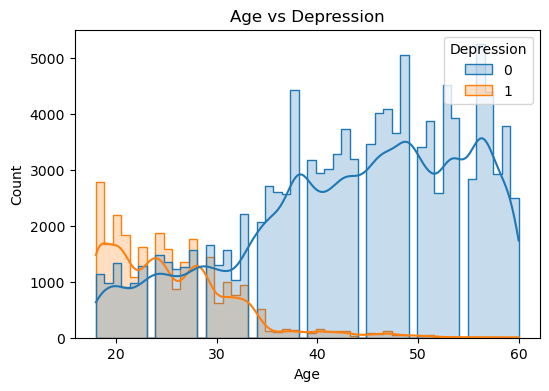

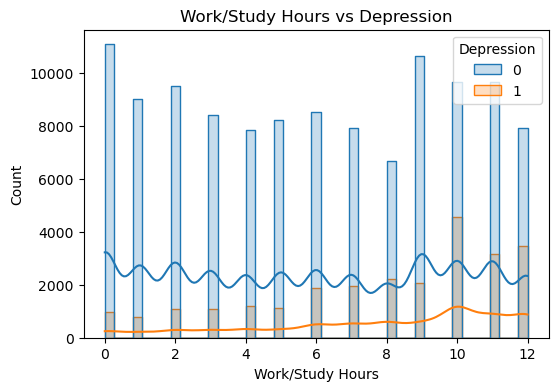

In [21]:
# finding relationship between num_feat and target

for col in Num_feat:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, hue='Depression', element='step')
    plt.title(f"{col} vs Depression")
    plt.show()

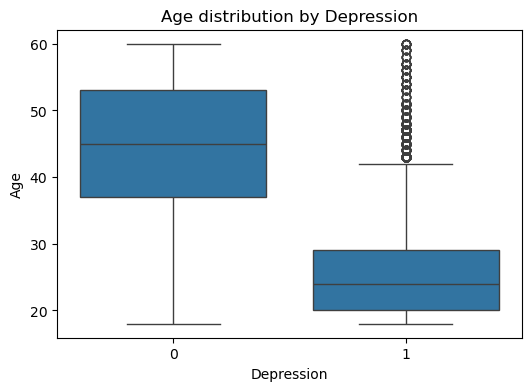

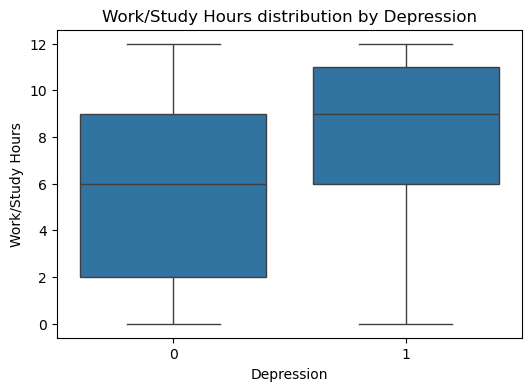

In [22]:
for col in Num_feat:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Depression', y=col)
    plt.title(f"{col} distribution by Depression")
    plt.show()

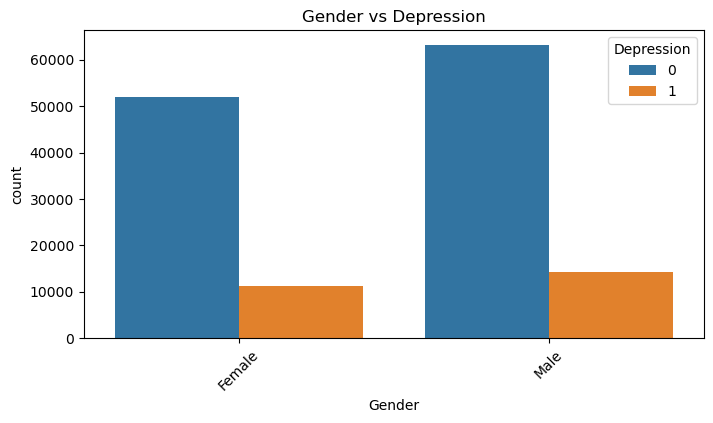

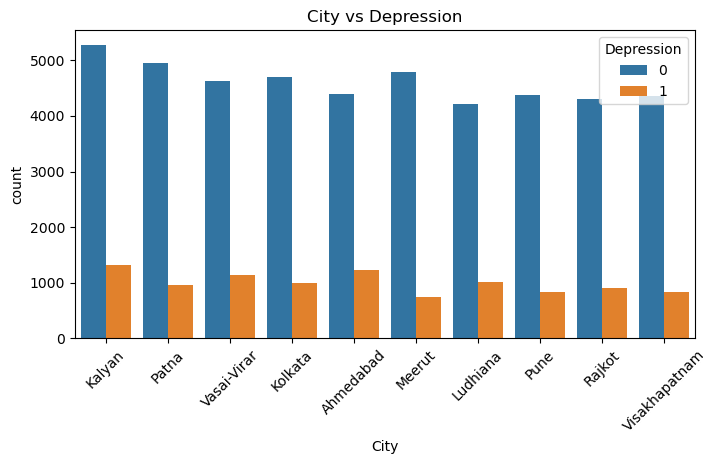

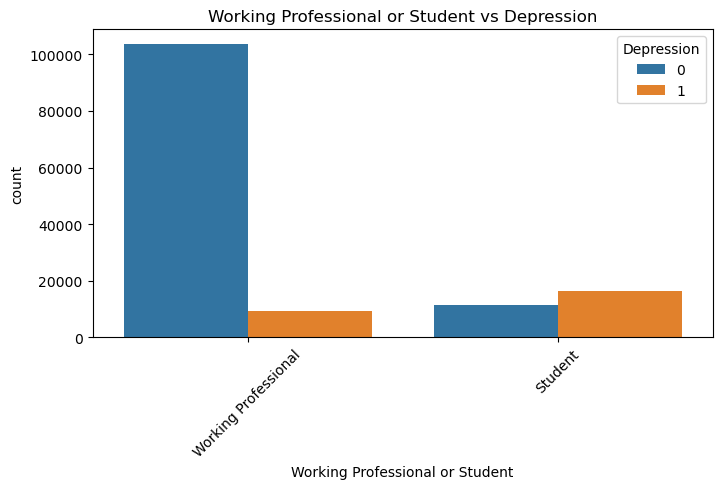

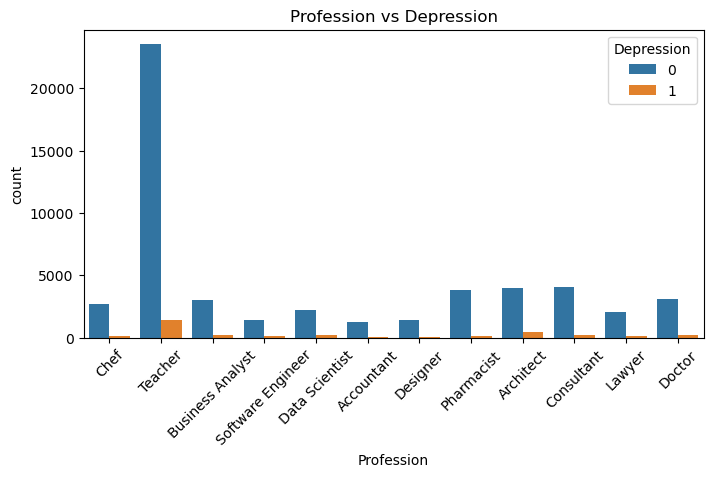

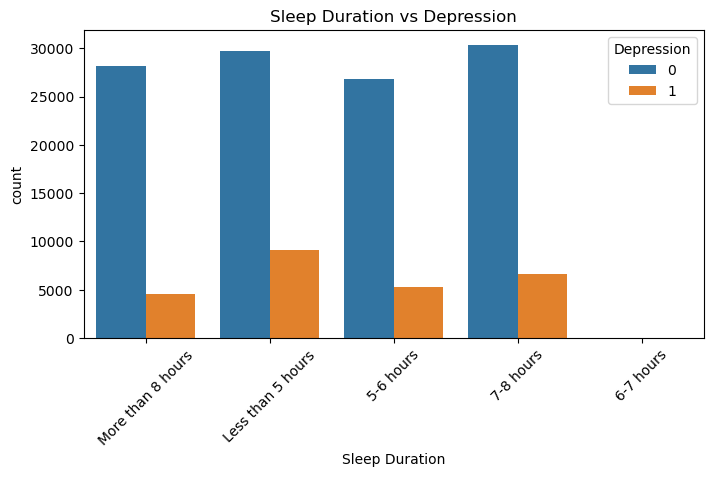

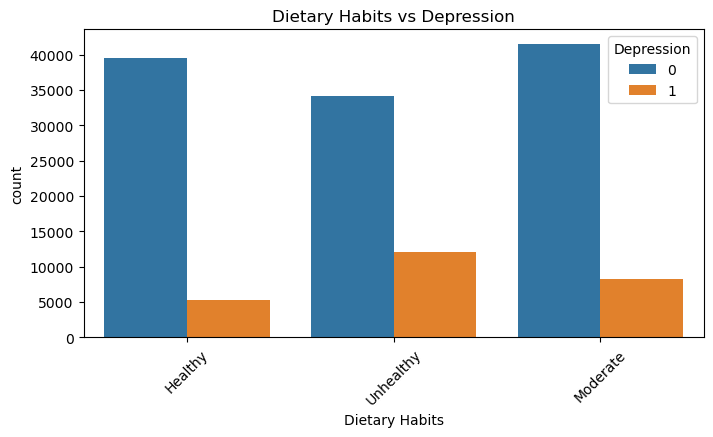

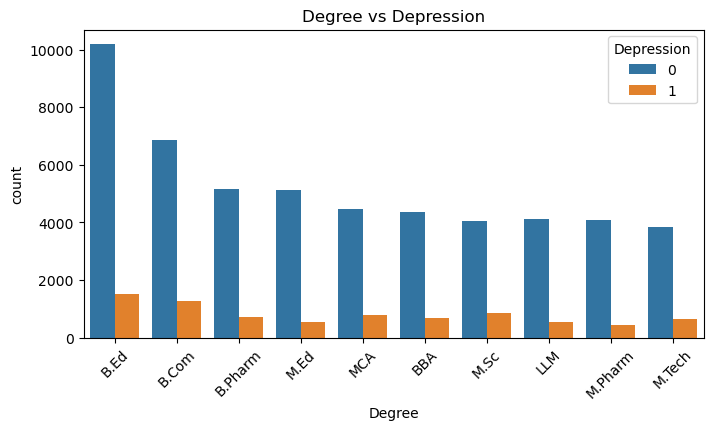

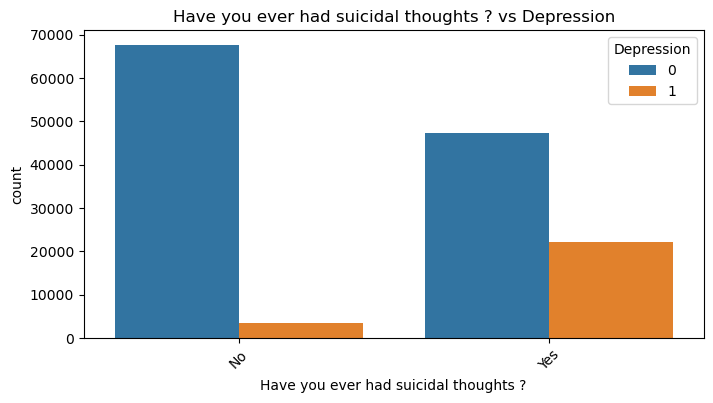

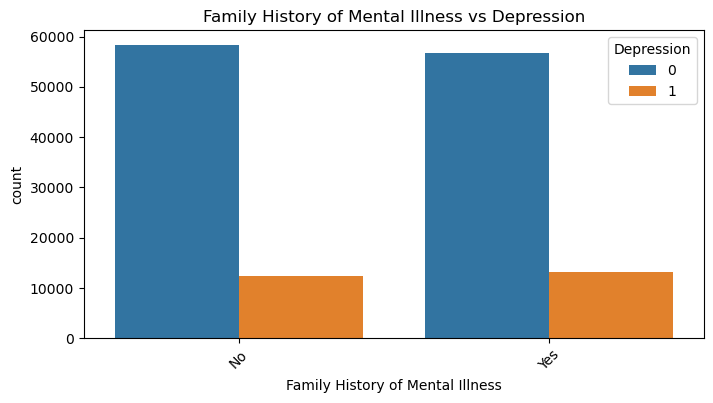

In [23]:
# finding the relationship between nominal features and the target

for col in nominal_feat:
    plt.figure(figsize=(8,4))
    if df[col].nunique() > 15:  # too many categories (City)
        order = df[col].value_counts().head(10).index
        sns.countplot(data=df, x=col, hue='Depression', order=order)
    else:
        sns.countplot(data=df, x=col, hue='Depression')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Depression")
    plt.show()

In [24]:
df[ordinal_feat].nunique()

Work Pressure       5
Job Satisfaction    5
Financial Stress    5
dtype: int64

In [25]:
df[nominal_feat].nunique()

Gender                                    2
City                                     31
Working Professional or Student           2
Profession                               12
Sleep Duration                            5
Dietary Habits                            3
Degree                                   17
Have you ever had suicidal thoughts ?     2
Family History of Mental Illness          2
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=0))
])

nominal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="if_binary"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, Num_feat),
        ("ord", ordinal_transformer, ordinal_feat),
        ("nom", nominal_transformer, nominal_feat)
    ]
)

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

def preprocessing_data(df):
    #df = df.drop(['id', 'Name', 'Academic Pressure', 'CGPA', 'Study Satisfaction'], axis=1)
    
    X = df.drop(['Depression'],axis=1)
    X_processed = preprocessor.fit_transform(X)
    y = df["Depression"]
    
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
    
    # converting to tensor
    X_train_tensor = torch.tensor(X_train.toarray() if hasattr(X_train, "toarray") else X_train, dtype=torch.float32)
    X_test_tensor  = torch.tensor(X_test.toarray() if hasattr(X_test, "toarray") else X_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    y_test_tensor  = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
    
    # wrap into Dataset and DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # creating a class object for the MLP 
    class MLP(nn.Module):
        def __init__(self,input_dim):
            super(MLP, self).__init__()
            self.network = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32,1),
                nn.Sigmoid()
            )
            
        def forward(self, x):
            return self.network(x)
        
    
    input_dim = X_train_tensor.shape[1]
    model = MLP(input_dim)
    
    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    epochs = 30
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
    
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, loss: {total_loss/len(train_loader):.4f}")
    
        # Evaluation
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test_tensor)
            y_pred_class = (y_pred > 0.5).float()
        
            # Accuracy
            accuracy = (y_pred_class.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]
        
            # Convert to numpy arrays for sklearn
            y_true_np = y_test_tensor.numpy()
            y_pred_np = y_pred_class.numpy()
        
            precision = precision_score(y_true_np, y_pred_np)
            recall = recall_score(y_true_np, y_pred_np)
            f1 = f1_score(y_true_np, y_pred_np)
        
            print(f"Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
        
    torch.save(model.state_dict(), "classification.pth")
    
    
    

In [28]:
preprocessing_data(df)

Epoch 1/30, loss: 0.1904
Test Accuracy: 0.9290, Precision: 0.8048, Recall: 0.8081, F1-score: 0.8065
Epoch 2/30, loss: 0.1755
Test Accuracy: 0.9291, Precision: 0.7953, Recall: 0.8254, F1-score: 0.8101
Epoch 3/30, loss: 0.1739
Test Accuracy: 0.9286, Precision: 0.8159, Recall: 0.7877, F1-score: 0.8016
Epoch 4/30, loss: 0.1732
Test Accuracy: 0.9283, Precision: 0.8249, Recall: 0.7722, F1-score: 0.7977
Epoch 5/30, loss: 0.1724
Test Accuracy: 0.9284, Precision: 0.8177, Recall: 0.7835, F1-score: 0.8002
Epoch 6/30, loss: 0.1715
Test Accuracy: 0.9287, Precision: 0.8207, Recall: 0.7815, F1-score: 0.8006
Epoch 7/30, loss: 0.1711
Test Accuracy: 0.9285, Precision: 0.8262, Recall: 0.7718, F1-score: 0.7981
Epoch 8/30, loss: 0.1705
Test Accuracy: 0.9294, Precision: 0.8021, Recall: 0.8157, F1-score: 0.8089
Epoch 9/30, loss: 0.1695
Test Accuracy: 0.9268, Precision: 0.8369, Recall: 0.7454, F1-score: 0.7885
Epoch 10/30, loss: 0.1691
Test Accuracy: 0.9284, Precision: 0.8051, Recall: 0.8036, F1-score: 0.8043

In [29]:
import pickle

with open("preprocessor_pipeline.pkl","wb") as f:
    pickle.dump(preprocessor, f)